### **Definiciones.**
------------
En el presente capitulo se realiza la instalación e importación de las librerías necesarias para el análisis y estadística descriptiva de la información, de igual manera, se realiza el cargue de la base de datos que será empleada en el análisis.



#### **Librerias y configuraciones.**
-----------
En este apartado se instalan todas las librerías y herramientas requeridas en el desarrollo del proyecto

In [12]:
!pip install dvc

In [13]:
import tarfile
import scipy.io
from scipy.io import loadmat
import numpy as np
import pandas as pd
import os
import cv2 as cv
import shutil
import random
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pathlib import Path

#### **Carga de la Base de Datos**
---
Se realiza el cargue de la base de datos desde el github donde se está consolidando el proyecto.

In [14]:
import pandas as pd

url = 'https://github.com/cris21309/tdsp_template_grupo8/blob/master/scripts/data_acquisition/diabetes.csv?raw=true'
df = pd.read_csv(url)
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## **Reporte de Datos**
---
Con la finalidad de tener un mayor entendimiento del proyecto y poder dimensionar en mejor manera el alcance y lo que se pretende en el proyecto, lo primero que se adelantara es el análisis exploratorio del conjunto de datos y de los archivos que hacen parte del dataset.


Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

### **Resumen general de los datos**
-------------
En esta sección se presenta un resumen general de los datos. Se describe el número total de observaciones, variables, el tipo de variables, la presencia de valores faltantes y la distribución de las variables, tembien se pretenden responder cuestiones como:

---
- ¿Cuántos Elementos tiene la base de datos?
- ¿Qué tamaño en MB de la base de datos?
- ¿cuales son las variables del análisis?
---------

In [17]:
total_registros = df['age'].count()
print(f"El Dataset contiene {total_registros} Registros para estudio de Diabetes")

El Dataset contiene 100000 Registros para estudio de Diabetes


In [50]:
rows, columns = df.shape
celdas = df.size
print(f"Numero de filas: {rows}, Numero de columnas: {columns}, numero de celdas {celdas}")

Numero de filas: 100000, Numero de columnas: 9, numero de celdas 900000


In [51]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


### **Resumen de calidad de los datos**
---
En esta sección se presenta un resumen de la calidad de los datos. Se describe la cantidad y porcentaje de valores faltantes, valores extremos, errores y duplicados. También se muestran las acciones tomadas para abordar estos problema

------

- ¿Hay datos faltantes, celdas vacías o de mala calidad?
- ¿existen valores atipicos o o sin formato?

In [52]:
#Datos nulos en df.
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

En la base de datos existen variables de carácter cualitativo como es el género y el historial de fumador, también variables numéricas como es el caso de la edad, el índice de masa corporal (bmi), la prueba de hemoglobina (HbA1c_level) y el nivel de glucosa en sangre, también variables de carácter booleano, como lo son la presencia de hipertensión o de laguna cardiopatía.
Estas consideraciones se deberán tener en cuenta al momento del pre procesamiento con la finalidad de garantizar que el estudio se delante de manera efectiva.


### **Annálisis de Varibles**
-----------
En el siguiente apartado se realiza una exploración general de las diferentes variables que componen la base de datos.

-------------

#### **Variable objetivo**
----------
En esta sección se describe la variable objetivo. Se muestra la distribución de la variable y se presentan gráficos que permiten entender mejor su comportamiento.

-----------

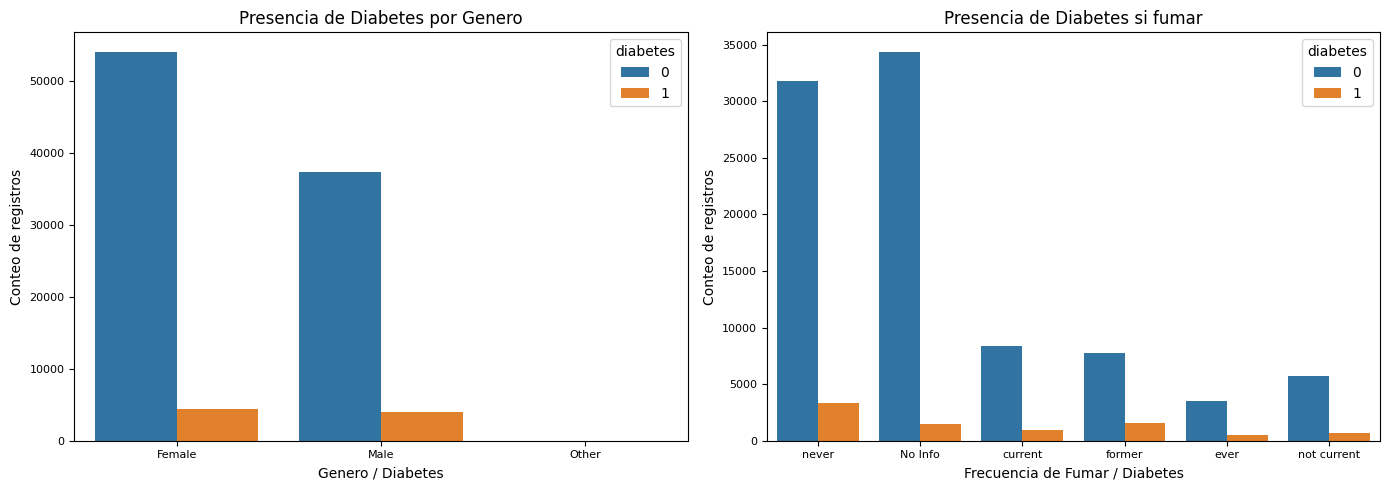

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,5))

sns.countplot(df, x='gender', hue='diabetes',ax=axes[0])
axes[0].set_title("Presencia de Diabetes por Genero", fontsize=12)
axes[0].set_xlabel('Genero / Diabetes', fontsize=10)
axes[0].set_ylabel('Conteo de registros', fontsize=10)
axes[0].tick_params(labelsize=8)

sns.countplot(df, x='smoking_history', hue='diabetes', ax=axes[1])
axes[1].set_title("Presencia de Diabetes si fumar", fontsize=12)
axes[1].set_xlabel('Frecuencia de Fumar / Diabetes', fontsize=10)
axes[1].set_ylabel('Conteo de registros', fontsize=10)
axes[1].tick_params(labelsize=8)

fig.tight_layout()

In [25]:
numeric = df._get_numeric_data()

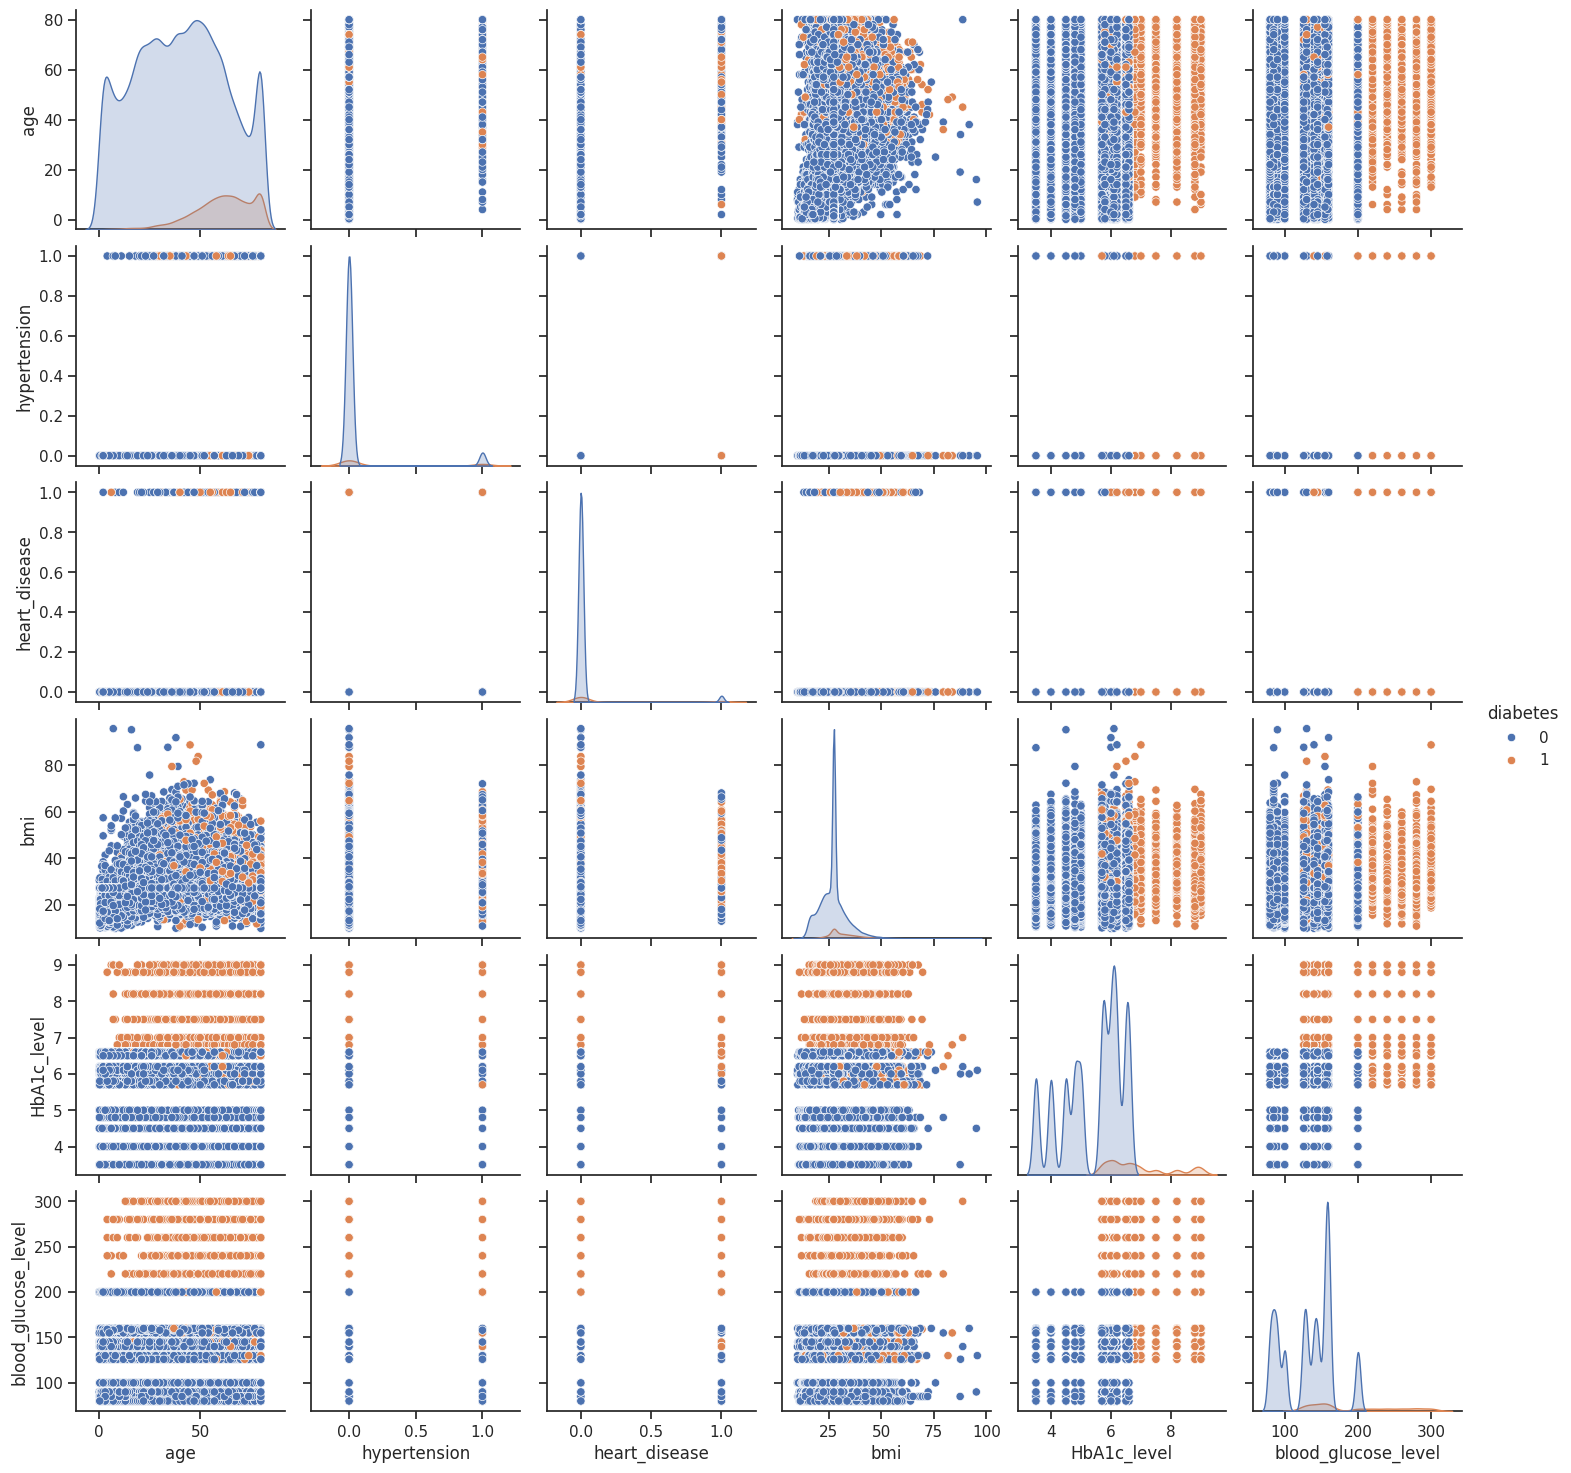

In [26]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(numeric, hue="diabetes")

En este apartado se ve el comportamiento de las variables respecto a la variable objetivo, con tal fin se hace uso de un diagrama de conteo para las variables cualitativas y un gráfico de dispersión para las variables numéricas.

En esta se evidencia que, la mayoría de los datos corresponde a no presencia de diabetes, y dentro de estos conjuntos la mayoría de los datos corresponde con mujeres. En cuanto a la relación con el cigarrillo, se observa que para la mayoría de los registros se relaciona o que no fuma o que no se cuenta con información; sin embargo para el caso de los registros con presencia de diabetes no se evidencia una diferencia tan grande para las diferentes categorías.

Al revisar los gráficos de dispersión, no se evidencian relación directa en todos los casos, sin embargo, para los casos de HbA1c_level y nivel de glucosa en sangre, altos valores parecen tener una relación directa con la presencia de diabetes.


#### **Variables individuales**
-----------
En esta sección se presenta un análisis detallado de cada variable individual. Se muestran estadísticas descriptivas, gráficos de distribución y de relación con la variable objetivo (si aplica). Además, se describen posibles transformaciones que se pueden aplicar a la variable.

----------------
A continuación se presentan los principales indicadores de dispersión y tendencia central de las variables de tipo numéricas del proyecto.

In [20]:
df.describe(percentiles= np.arange(0,1,0.2)).applymap('{:.3f}'.format)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,41.886,0.075,0.039,27.321,5.528,138.058,0.085
std,22.517,0.263,0.195,6.637,1.071,40.708,0.279
min,0.080,0.000,0.000,10.010,3.500,80.000,0.000
0%,0.080,0.000,0.000,10.010,3.500,80.000,0.000
20%,20.000,0.000,0.000,22.390,4.500,90.000,0.000
40%,36.000,0.000,0.000,27.130,5.700,130.000,0.000
50%,43.000,0.000,0.000,27.320,5.800,140.000,0.000
60%,49.000,0.000,0.000,27.320,6.000,155.000,0.000
80%,63.000,0.000,0.000,31.070,6.500,159.000,0.000


In [21]:
#Tabla de relación entre, los niveles de Severidad, la clase de Siniestro y los años.
df.pivot_table(df, index=['gender','smoking_history',], columns=['diabetes' ],aggfunc='size', fill_value=0)

diabetes                    0     1
gender smoking_history             
Female No Info          18946   754
       current           4607   451
       ever              2027   211
       former            4125   649
       never            20867  2002
       not current       3519   394
Male   No Info          15410   700
       current           3731   497
       ever              1504   261
       former            3637   941
       never            10879  1344
       not current       2230   296
Other  No Info              6     0
       ever                 1     0
       never                3     0
       not current          8     0

Para el caso del análisis de las variables individuales se observa que, el promedio de edad es de 41.88 años, en el caso de la hipertensión y cardiopatía es menor al 0.5 (0.075 y 0.039 respectivamente), el índice de masa corporal esta por el 27.32% (por encima del 25 sobrepeso), HbA1c_level con promedio de 5.528, glucosa en sangre de 138.058 y para el caso de la variable objetivo se observa un valor promedio de 0.085 mucho menor al 0.5, dando una idea de la muestra empleada en el estudio.

Es bueno tener en cuenta los diferentes valores y las distribuciones de las variables que pueden resultar significativas en el presente estudio.

Por otra parte, la pivot table muestra como es la relación entre las diferentes variables categóricas.


#### **Relación entre variables explicativas y variable objetivo**
------------

En esta sección se presenta un análisis de la relación entre las variables explicativas y la variable objetivo. Se utilizan gráficos como la matriz de correlación y el diagrama de dispersión para entender mejor la relación entre las variables. Además, se pueden utilizar técnicas como la regresión lineal para modelar la relación entre las variables.

------------

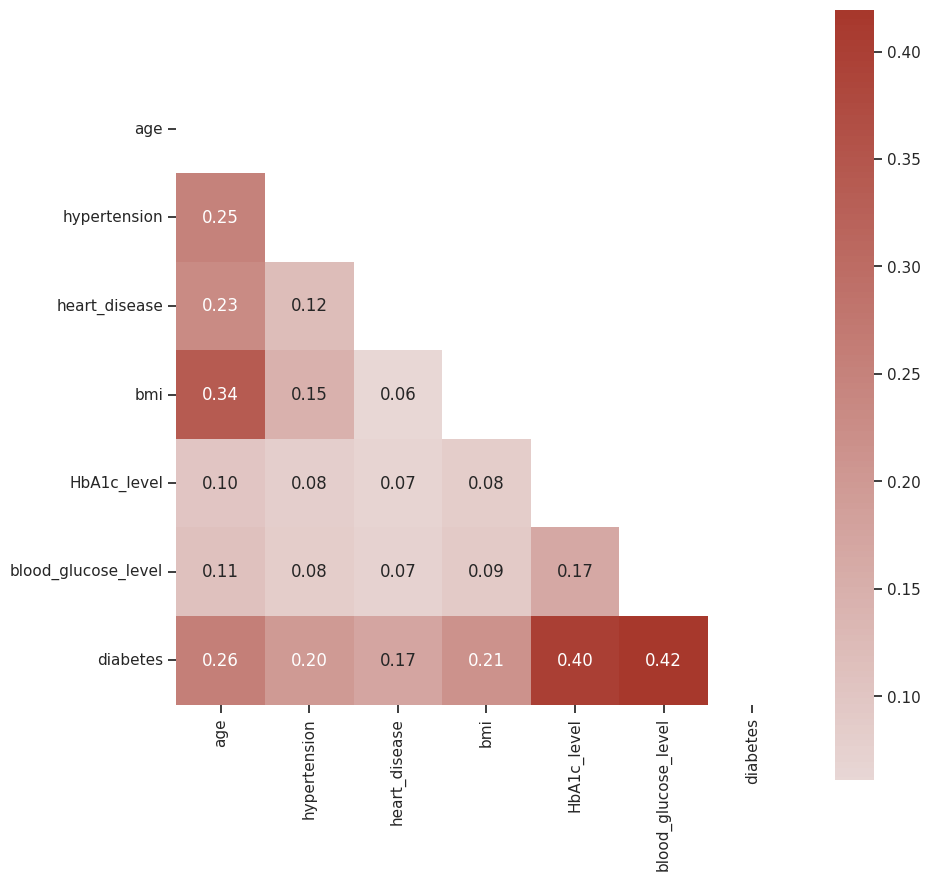

In [22]:

labels = list(numeric.columns.values)

# Calculate pairwise-correlation
matrix = numeric.corr()
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
plt.show();

Con la finalidad de tener un mayor entendimiento de las posibles variables se ha empelado un gráfico a partir de la correlación de Pearson para las variables numéricas, el analizar los valores, se observa que los mayores valores de correlación se encuentran en 0.40 y 0.42, obteniéndose en la correlación lineal entre el nivel de glucosa con diabetes y HbA1c_level con diabetes, confirmando lo evidenciado en los aparatados anteriores.